# Published Books- Data Analysis and Visualization

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading Dataframe
df = pd.read_csv('Books.csv')

In [5]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Book               264 non-null    object
 1   Author(s)          264 non-null    object
 2   Original language  264 non-null    object
 3   First published    264 non-null    object
 4   Approximate sales  264 non-null    object
 5   Genre              264 non-null    object
dtypes: object(6)
memory usage: 12.5+ KB
None


In [6]:
# Display the first few rows of the DataFrame
print(df.head())

                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (???)                Cao Xueqin   

  Original language First published                      Approximate sales  \
0           English            1859  >200 million[20][circular reporting?]   
1            French            1943                    200 million[21][22]   
2           English            1997                    120 million[23][24]   
3           English            1939                        100 million[25]   
4           Chinese            1791                    100 million[26][27]   

                         Genre  
0           Historical fiction  
1  Fantasy, Children's fic

In [7]:
# Descriptive statistics of numerical columns
print(df.describe())

                        Book      Author(s) Original language First published  \
count                    264            264               264             264   
unique                   170            153                16              98   
top     Tuesdays with Morrie  J. K. Rowling           English            1979   
freq                       3              7               198              10   

       Approximate sales    Genre  
count                264      264  
unique               166       74  
top       65 million[35]  Erotica  
freq                   5       77  


In [8]:
# Check for missing values
print(df.isnull().sum())

Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64


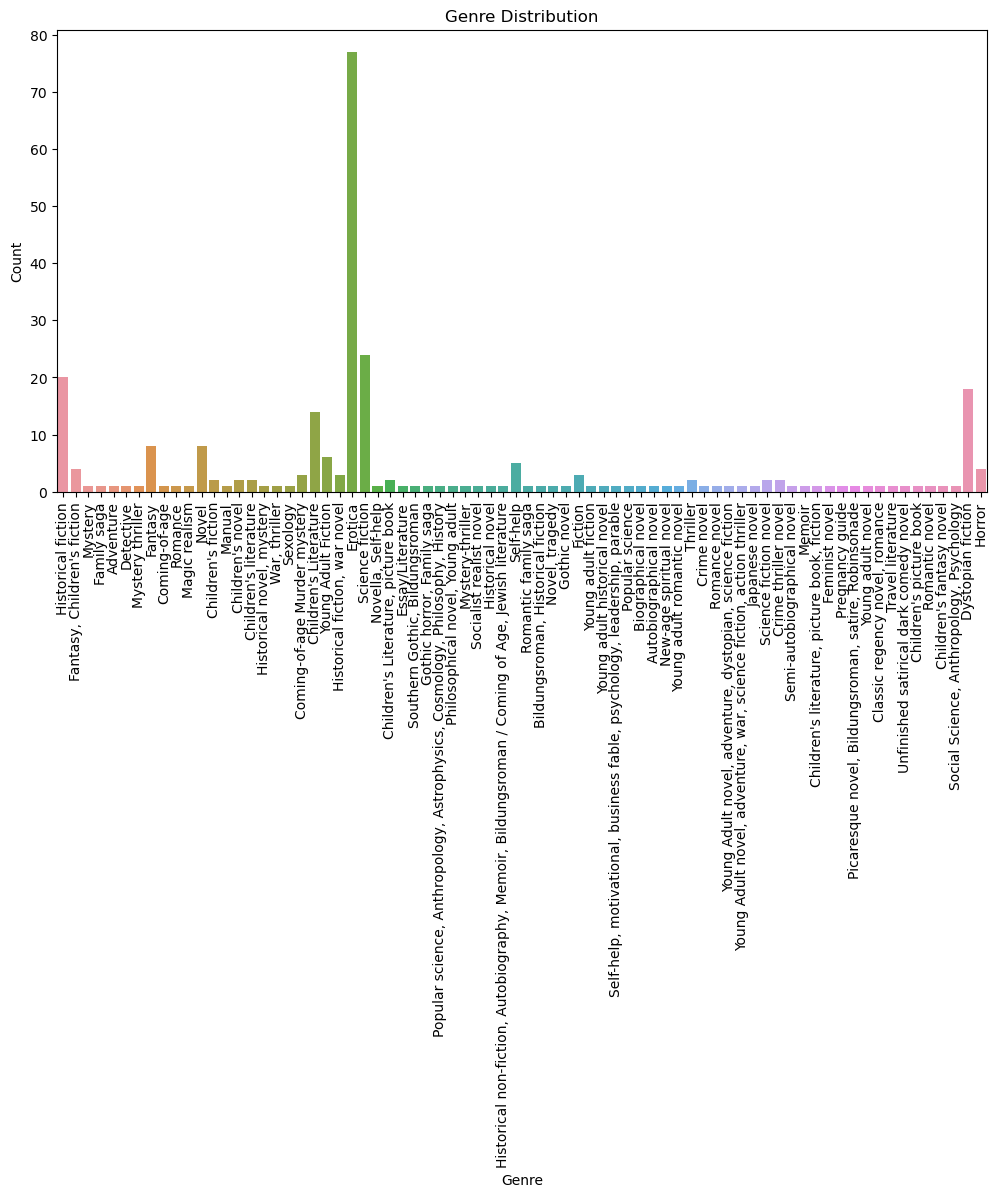

In [9]:
# Bar Chart for genre distribution

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation ='vertical')
plt.show()

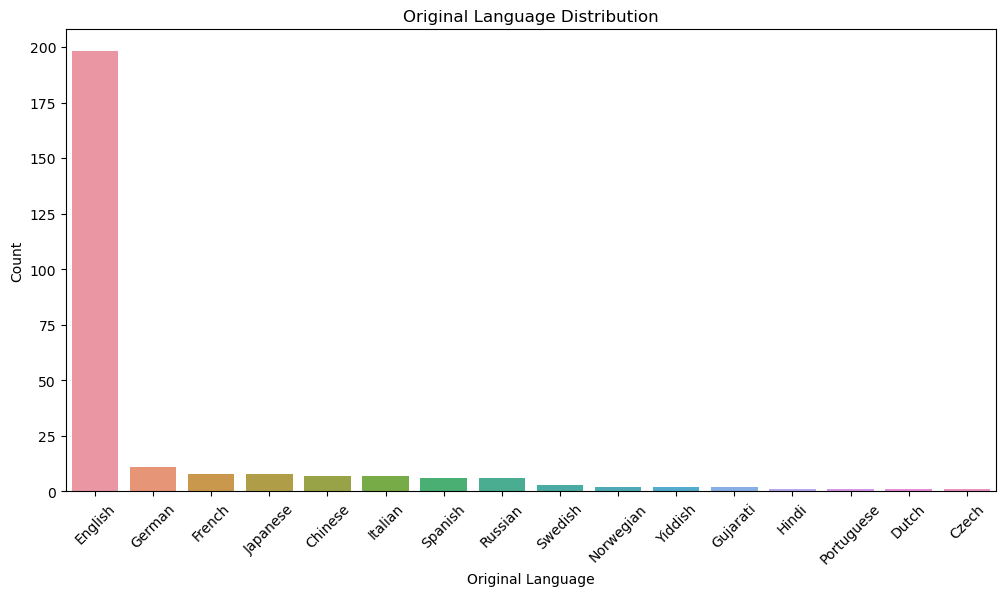

In [10]:
# Chart for original language distribution 
plt.figure(figsize=(12, 6))
sns.countplot(x='Original language', data=df, order=df['Original language'].value_counts().index)
plt.title('Original Language Distribution')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

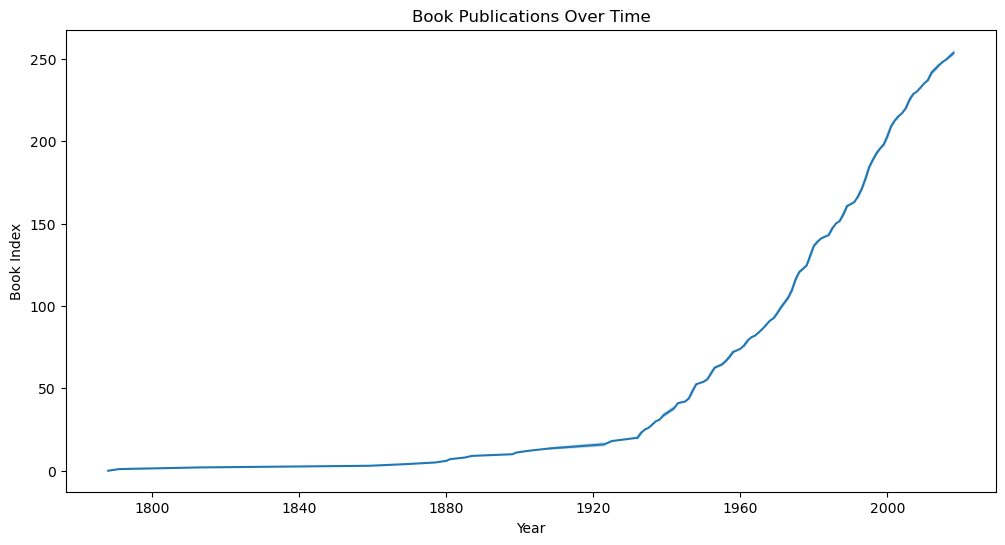

In [11]:
# Visualize how book publications have evolved over time

df['First published'] = pd.to_datetime(df['First published'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.lineplot(x='First published', y=df.index, data=df.sort_values('First published'))
plt.title('Book Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Book Index')
plt.show()

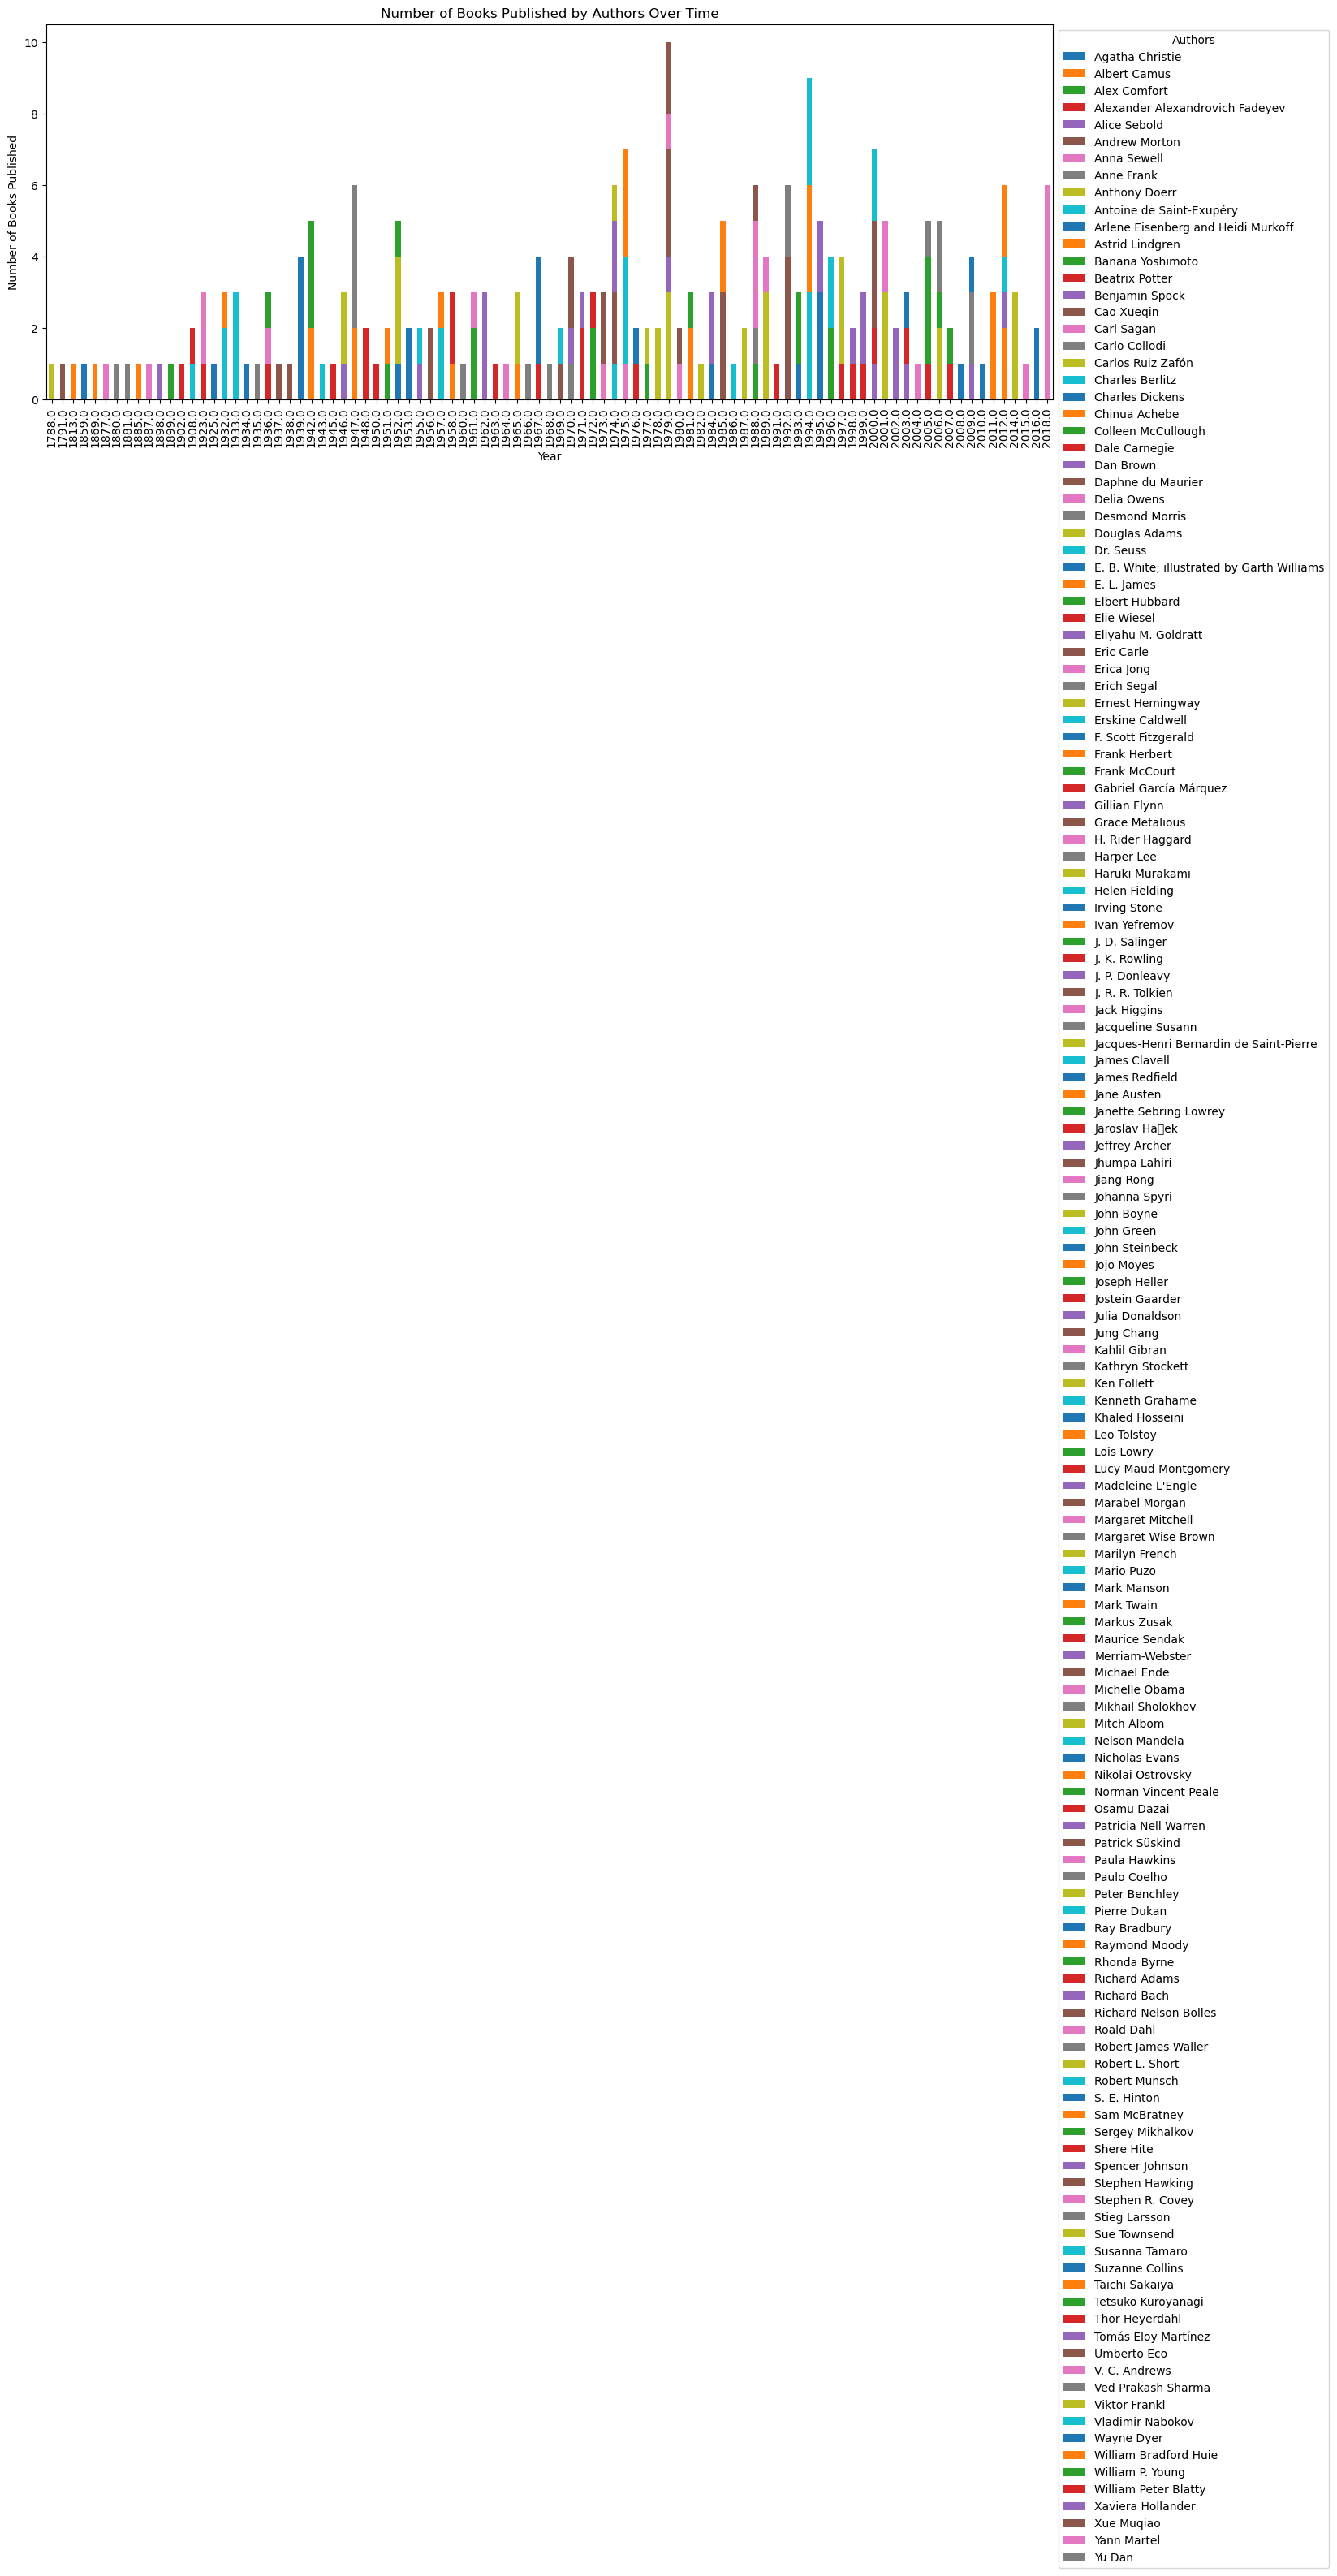

In [12]:
# Line chart showing the number of books published by authors over time

import warnings # to ignore warnings because of missing glyphs 
warnings.filterwarnings('ignore')

# Make sure 'First published' is in datetime format
df['First published'] = pd.to_datetime(df['First published'])

# Group by author and year, and count the number of books published
author_year_counts = df.groupby(['Author(s)', df['First published'].dt.year]).size().reset_index(name='Book Count')

# Pivot the table for easy plotting
pivot_table = author_year_counts.pivot(index='First published', columns='Author(s)', values='Book Count').fillna(0)

# Create a bar plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Number of Books Published by Authors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')

# Place the legend in the upper left corner
ax.legend(title='Authors', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()